## IS602 Homework 12
### Marco Siqueira Campos


In [1]:
# Do the hw11 in parallel and compare with original solution

In [1]:
import Tkinter
import tkFileDialog
import pandas as pd
import numpy as np
import os 
import timeit
import ipyparallel

ImportError: No module named 'Tkinter'

In [ ]:
root = Tkinter.Tk()
root.withdraw()
filename = tkFileDialog.askopenfilename(parent=root)

In [ ]:
apple=pd.read_csv(filename)
apple.columns=['date','price','change']
apple.head() # check if is all right

Populating the interactive namespace from numpy and matplotlib


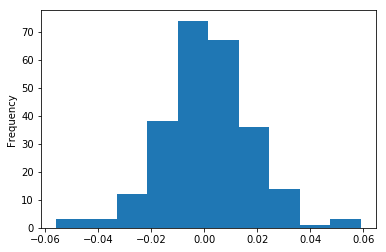

In [4]:
# change for numeric and convert the first value to NaN
apple.change=pd.to_numeric(apple.change, errors='coerce')
# Compute de mean and standard deviation 
mu=np.mean(apple.change)
sigma=np.std(apple.change)
%pylab inline
apple.change.plot.hist()

In [5]:
# Variables set-up
M=10000 # iterations number
S0 = apple['price'][251] # asset price at t=0
N = 20 #number of time steps
d20=[]

In [6]:
%timeit d20
new=[] 
for i in range(M):
    S=S0
    d20=np.random.normal(mu,sigma,N)
    for n in d20:
        S = S + n*S                 
    new.append(S)    
   
np.percentile(new,1)

10000000 loops, best of 3: 52.2 ns per loop


349.20124093761217

In [2]:
# At notebook terminal change by hand for 4 clusters
# equivalent at Ipcluster start -n 4
from ipyparallel import Client
clients=ipyparallel.Client()
dview=clients.direct_view ()

ImportError: No module named ipyparallel

In [3]:
%%px
import Tkinter
import tkFileDialog
import pandas as pd
import numpy as np
import os 
import timeit
import ipyparallel
root = Tkinter.Tk()
root.withdraw()
filename = tkFileDialog.askopenfilename(parent=root)
apple=pd.read_csv(filename)
apple.columns=['date','price','change']
print apple.head() # check if is all right
# change for numeric and convert the first value to NaN
apple.change=pd.to_numeric(apple.change, errors='coerce')
# Compute de mean and standard deviation 
mu=np.mean(apple.change)
sigma=np.std(apple.change)

M=10000 # iterations number
S0 = apple['price'][251] # asset price at t=0
N = 20 #number of time steps

# parallel
clients = ipyparallel.Client()
dview = clients.direct_view



ERROR:root:Cell magic `%%px` not found.


In [10]:
%%px
d20=[]
%timeit d20
new=[]
for i in range(M):
    S=S0
    d20=np.random.normal(mu,sigma,N)
    for n in d20:
        S = S + n*S                 
    new.append(S)    
   
print np.percentile(new,1)

[stdout:0] 
10000000 loops, best of 3: 85.8 ns per loop
345.823078249
[stdout:1] 
10000000 loops, best of 3: 82.7 ns per loop
346.566289746
[stdout:2] 
1000000 loops, best of 3: 163 ns per loop
347.905682588
[stdout:3] 
The slowest run took 17.00 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 85.3 ns per loop
346.386235266
